In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv("Titanic-Dataset.csv")

In [42]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
data.shape

(891, 12)

In [44]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [45]:
import seaborn as sns

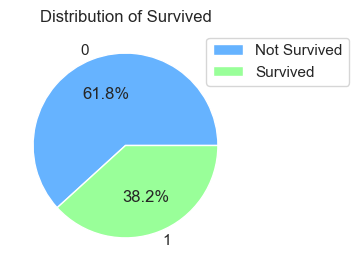

In [99]:
plt.figure(figsize=(3, 3))
survived_counts = data['Survived'].value_counts()
survived_counts.plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'])
plt.title('Distribution of Survived')
plt.ylabel('')
plt.legend(labels=['Not Survived', 'Survived'],bbox_to_anchor=(1.5, 1))
plt.show()

In [46]:
sns.set(style="whitegrid")

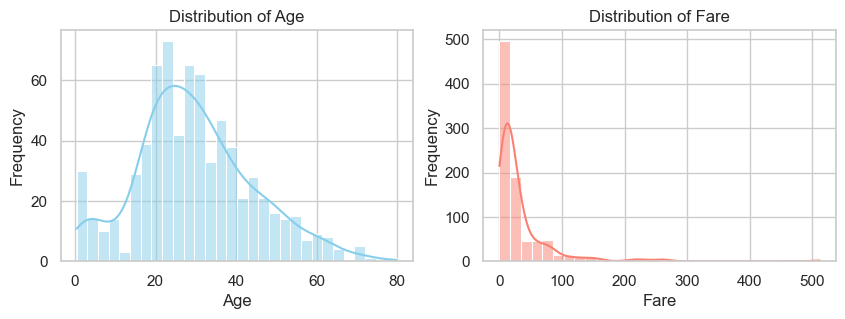

In [81]:
plt.figure(figsize=(10, 3))
# First histogram for Age
plt.subplot(1, 2, 1)
sns.histplot(data['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Second histogram for Fare
plt.subplot(1, 2, 2)
sns.histplot(data['Fare'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

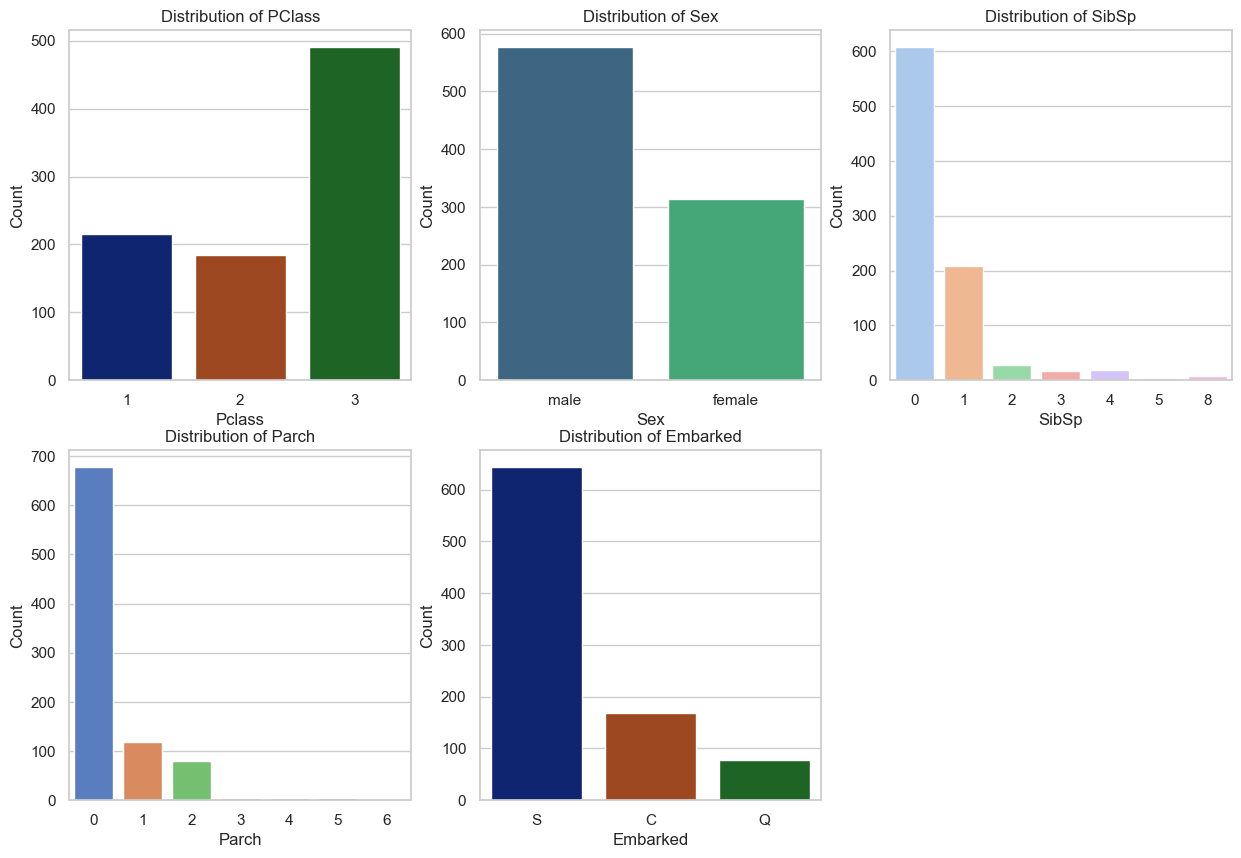

In [89]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Bar chart for PClass
sns.countplot(x='Pclass', data=data, palette='dark', ax=axes[0])
axes[0].set_title('Distribution of PClass')
axes[0].set_ylabel('Count')

# Bar chart for Sex
sns.countplot(x='Sex', data=data, palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of Sex')
axes[1].set_ylabel('Count')

# Bar chart for SibSp
sns.countplot(x='SibSp', data=data, palette='pastel', ax=axes[2])
axes[2].set_title('Distribution of SibSp')
axes[2].set_ylabel('Count')

# Bar chart for Parch
sns.countplot(x='Parch', data=data, palette='muted', ax=axes[3])
axes[3].set_title('Distribution of Parch')
axes[3].set_ylabel('Count')

# Bar chart for Embarked
sns.countplot(x='Embarked', data=data, palette='dark', ax=axes[4])
axes[4].set_title('Distribution of Embarked')
axes[4].set_ylabel('Count')

axes[5].axis('off')
plt.show()

In [90]:
data.duplicated().sum()

0

In [91]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [92]:
mean_age = data['Age'].mean()
data['Age'].fillna(mean_age, inplace=True)

In [93]:
data = data.dropna(subset=['Embarked'])
data = data.reset_index(drop=True)

In [94]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [126]:
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y = data['Survived']

In [105]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
884,2,male,27.000000,0,0,13.0000,S
885,1,female,19.000000,0,0,30.0000,S
886,3,female,29.699118,1,2,23.4500,S
887,1,male,26.000000,0,0,30.0000,C


In [106]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
884    0
885    1
886    0
887    1
888    0
Name: Survived, Length: 889, dtype: int64

In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [128]:
# Label encoding for "Sex" column
X["Sex"]=le.fit_transform(X["Sex"])
X

C:\Users\acer\AppData\Local\Temp\ipykernel_23116\636405397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"]=le.fit_transform(X["Sex"])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,S
1,1,0,38.000000,1,0,71.2833,C
2,3,0,26.000000,0,0,7.9250,S
3,1,0,35.000000,1,0,53.1000,S
4,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
884,2,1,27.000000,0,0,13.0000,S
885,1,0,19.000000,0,0,30.0000,S
886,3,0,29.699118,1,2,23.4500,S
887,1,1,26.000000,0,0,30.0000,C


In [130]:
# One hot encoding for "Embarked" column
X = pd.get_dummies(X, columns = ['Embarked'])
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,0,38.000000,1,0,71.2833,1,0,0
2,3,0,26.000000,0,0,7.9250,0,0,1
3,1,0,35.000000,1,0,53.1000,0,0,1
4,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
884,2,1,27.000000,0,0,13.0000,0,0,1
885,1,0,19.000000,0,0,30.0000,0,0,1
886,3,0,29.699118,1,2,23.4500,0,0,1
887,1,1,26.000000,0,0,30.0000,1,0,0


In [132]:
columns_to_scale = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [138]:
# Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
sc_mm = MinMaxScaler()
X_mm = X.copy()
X_mm[columns_to_scale] = sc_mm.fit_transform(X[columns_to_scale])
X_mm

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1.0,1,0.271174,0.125,0.000000,0.014151,0,0,1
1,0.0,0,0.472229,0.125,0.000000,0.139136,1,0,0
2,1.0,0,0.321438,0.000,0.000000,0.015469,0,0,1
3,0.0,0,0.434531,0.125,0.000000,0.103644,0,0,1
4,1.0,1,0.434531,0.000,0.000000,0.015713,0,0,1
...,...,...,...,...,...,...,...,...,...
884,0.5,1,0.334004,0.000,0.000000,0.025374,0,0,1
885,0.0,0,0.233476,0.000,0.000000,0.058556,0,0,1
886,1.0,0,0.367921,0.125,0.333333,0.045771,0,0,1
887,0.0,1,0.321438,0.000,0.000000,0.058556,1,0,0


In [139]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
sc_st = StandardScaler()
X_st = X.copy()
X_st[columns_to_scale] = sc_st.fit_transform(X[columns_to_scale])
X_st

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.825209,1,-0.590495,0.431350,-0.474326,-0.500240,0,0,1
1,-1.572211,0,0.643971,0.431350,-0.474326,0.788947,1,0,0
2,0.825209,0,-0.281878,-0.475199,-0.474326,-0.486650,0,0,1
3,-1.572211,0,0.412509,0.431350,-0.474326,0.422861,0,0,1
4,0.825209,1,0.412509,-0.475199,-0.474326,-0.484133,0,0,1
...,...,...,...,...,...,...,...,...,...
884,-0.373501,1,-0.204724,-0.475199,-0.474326,-0.384475,0,0,1
885,-1.572211,0,-0.821957,-0.475199,-0.474326,-0.042213,0,0,1
886,0.825209,0,0.003524,0.431350,2.006119,-0.174084,0,0,1
887,-1.572211,1,-0.281878,-0.475199,-0.474326,-0.042213,1,0,0


In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_mm_train, X_mm_test, X_st_train, X_st_test, Y_train, Y_test = train_test_split(X_mm, X_st, Y, test_size=0.2, random_state=24)

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [161]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM Linear Kernel': SVC(kernel='linear', random_state=42),
    'SVM RBF Kernel': SVC(kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP Classifier': MLPClassifier(random_state=42)
}
results_df = pd.DataFrame(columns=['Model', 'Train Acc (MinMax)', 'Test Acc (MinMax)', 'Train Acc (Standard)', 'Test Acc (Standard)'])

In [162]:
for model_name, model in models.items():
    print(f"\nTraining and evaluating {model_name}...\n")

    # Training on Min-Max scaled data
    model.fit(X_mm_train, Y_train)
    y_pred_mm = model.predict(X_mm_train)
    accuracy_mm = accuracy_score(Y_train, y_pred_mm)
    y_pred_mm_test = model.predict(X_mm_test)
    accuracy_mm_test = accuracy_score(Y_test, y_pred_mm_test)
    print(f"Accuracy on Min-Max scaled training set: {accuracy_mm:.4f}")
    print(f"Accuracy on Min-Max scaled test set: {accuracy_mm_test:.4f}")
    print(f"Classification Report on Min-Max scaled training set:\n{classification_report(Y_train, y_pred_mm)}")

    # Training on Standard scaled data
    model.fit(X_st_train, Y_train)
    y_pred_st = model.predict(X_st_train)
    accuracy_st = accuracy_score(Y_train, y_pred_st)
    y_pred_st_test = model.predict(X_st_test)
    accuracy_st_test = accuracy_score(Y_test, y_pred_st_test)
    print(f"\nAccuracy on Standard scaled training set: {accuracy_st:.4f}")
    print(f"\nAccuracy on Standard scaled test set: {accuracy_st_test:.4f}")
    print(f"Classification Report on Standard scaled training set:\n{classification_report(Y_train, y_pred_st)}")
    print("\n" + "=" * 50 + "\n\n")
    
    # Storing results in dataframe
    results_df = results_df.append({
        'Model': model_name,
        'Train Acc (MinMax)': accuracy_mm,
        'Test Acc (MinMax)': accuracy_mm_test,
        'Train Acc (Standard)': accuracy_st,
        'Test Acc (Standard)': accuracy_st_test
    }, ignore_index=True)


Training and evaluating Logistic Regression...

Accuracy on Min-Max scaled training set: 0.7834
Accuracy on Min-Max scaled test set: 0.8764
Classification Report on Min-Max scaled training set:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       433
           1       0.74      0.69      0.71       278

    accuracy                           0.78       711
   macro avg       0.77      0.77      0.77       711
weighted avg       0.78      0.78      0.78       711


Accuracy on Standard scaled training set: 0.7834

Accuracy on Standard scaled test set: 0.8820
Classification Report on Standard scaled training set:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       433
           1       0.74      0.68      0.71       278

    accuracy                           0.78       711
   macro avg       0.77      0.77      0.77       711
weighted avg       0.78      0.78      0.78       711



C:\Users\acer\AppData\Local\Temp\ipykernel_23116\3225162779.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\acer\AppData\Local\Temp\ipykernel_23116\3225162779.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Accuracy on Min-Max scaled training set: 0.9817
Accuracy on Min-Max scaled test set: 0.8764
Classification Report on Min-Max scaled training set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       433
           1       0.99      0.96      0.98       278

    accuracy                           0.98       711
   macro avg       0.98      0.98      0.98       711
weighted avg       0.98      0.98      0.98       711


Accuracy on Standard scaled training set: 0.9817

Accuracy on Standard scaled test set: 0.8820
Classification Report on Standard scaled training set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       433
           1       0.99      0.96      0.98       278

    accuracy                           0.98       711
   macro avg       0.98      0.98      0.98       711
weighted avg       0.98      0.98      0.98       711





Training and evaluating SVM Linear Kernel...


C:\Users\acer\AppData\Local\Temp\ipykernel_23116\3225162779.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\acer\AppData\Local\Temp\ipykernel_23116\3225162779.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\acer\AppData\Local\Temp\ipykernel_23116\3225162779.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\acer\AppData\Local\Temp\ipykernel_23116\3225162779.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({



Accuracy on Standard scaled training set: 0.7722

Accuracy on Standard scaled test set: 0.8427
Classification Report on Standard scaled training set:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       433
           1       0.72      0.67      0.70       278

    accuracy                           0.77       711
   macro avg       0.76      0.75      0.76       711
weighted avg       0.77      0.77      0.77       711





Training and evaluating SVM RBF Kernel...

Accuracy on Min-Max scaled training set: 0.7975
Accuracy on Min-Max scaled test set: 0.8708
Classification Report on Min-Max scaled training set:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       433
           1       0.87      0.57      0.69       278

    accuracy                           0.80       711
   macro avg       0.82      0.76      0.77       711
weighted avg       0.81      0.80      0.79       711


A

C:\Users\acer\AppData\Local\Temp\ipykernel_23116\3225162779.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on Min-Max scaled training set: 0.8143
Accuracy on Min-Max scaled test set: 0.8652
Classification Report on Min-Max scaled training set:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       433
           1       0.81      0.68      0.74       278

    accuracy                           0.81       711
   macro avg       0.81      0.79      0.80       711
weighted avg       0.81      0.81      0.81       711


Accuracy on Standard scaled training set: 0.8411

Accuracy on Standard scaled test set: 0.8539
Classification Report on Standard scaled training set:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       433
           1       0.88      0.69      0.77       278

    accuracy                           0.84       711
   macro avg       0.85      0.81      0.83       711
weighted avg       0.85      0.84      0.84       711






C:\Users\acer\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\acer\AppData\Local\Temp\ipykernel_23116\3225162779.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [163]:
results_df

,Model,Train Acc (MinMax),Test Acc (MinMax),Train Acc (Standard),Test Acc (Standard)
0,Logistic Regression,0.783404,0.876404,0.783404,0.882022
1,Decision Tree,0.981716,0.825843,0.981716,0.825843
2,Random Forest,0.981716,0.876404,0.981716,0.882022
3,SVM Linear Kernel,0.772152,0.842697,0.772152,0.842697
4,SVM RBF Kernel,0.797468,0.870787,0.819972,0.853933
5,KNN,0.846695,0.870787,0.843882,0.803371
6,Naive Bayes,0.784810,0.814607,0.784810,0.814607
7,MLP Classifier,0.814346,0.865169,0.841069,0.853933


# For training data, best performing model are Decision Tree and Random Forest with 98.17% accuracy for both scaling. However for test data, Random Forest and Logistic Regression with standard scaling performed best with 88.2% accuracy.